In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
dataset = "HU"

In [3]:
df_means = pd.read_csv("master/outputs/cluster_means/%s_means.csv"%dataset)
df_emb = pd.read_csv("master/outputs/embeddings/%s_embedding.csv"%dataset)
df_edges = pd.read_csv("master/data/%s_edges.csv"%dataset, index_col="node_1")
df_emb.shape

(47538, 32)

In [4]:
with open('master/outputs/assignments/%s.json'%dataset) as json_file:  
    labels = json.load(json_file)
    
df_label = pd.DataFrame({"index" : list(labels.keys()), "label" : list(labels.values())})
df_label["index"] = df_label["index"].astype(int)
df_label = df_label.set_index("index")
df_label = df_label.sort_index()
print(df_label.shape)
df_label.head()

(47538, 1)


,label
index,
0,19
1,29
2,31
3,3
4,7


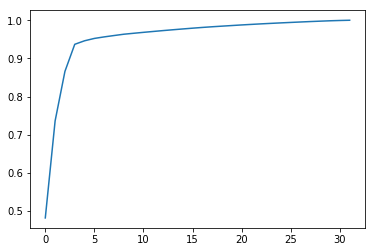

In [5]:
pca = PCA().fit(df_emb)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [6]:
sum(pca.explained_variance_ratio_[:3])

0.8658973126845071

In [7]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df_emb)
projected.shape

(47538, 2)

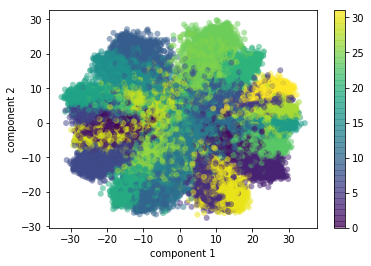

In [8]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_label.label, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Text(0, 0.5, 'component 2')

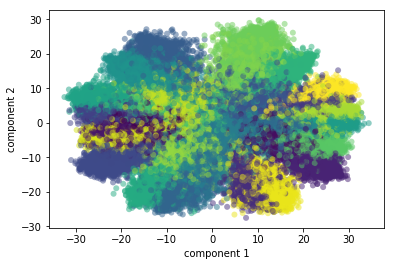

In [9]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=df_label.label, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.colorbar();

In [10]:
pca = PCA(3)  # project from 64 to 2 dimensions
projected = pca.fit_transform(df_emb)

(-28, 28)

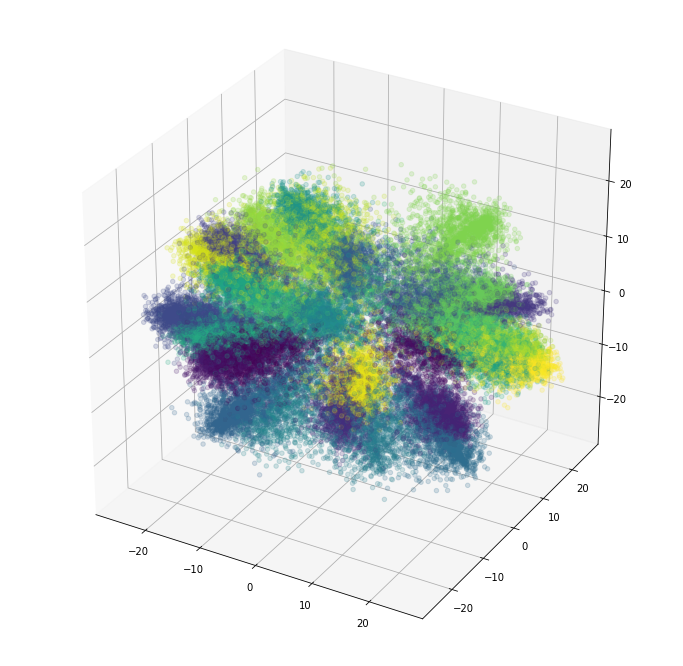

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
            c=df_label.label, alpha=0.2)

limit = 28
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)

### Make Two Plots

In [29]:
projected_po = projected.copy()
df_label_po = df_label.copy()

In [39]:
projected_hu = projected.copy()
df_label_hu = df_label.copy()

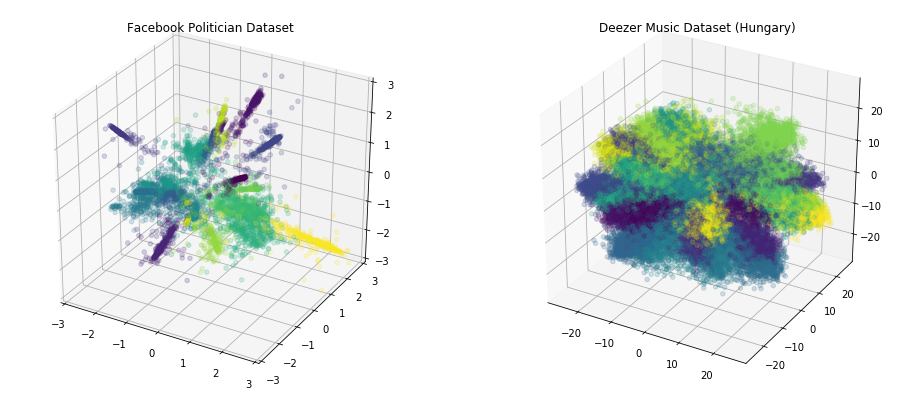

In [49]:
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(projected_po[:, 0], projected_po[:, 1], projected_po[:, 2],
            c=df_label_po.label, alpha=0.2)

limit = 3
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)
ax.set_title("Facebook Politician Dataset")

ax = fig.add_subplot(122, projection='3d')
ax.scatter(projected_hu[:, 0], projected_hu[:, 1], projected_hu[:, 2],
            c=df_label_hu.label, alpha=0.2)

limit = 28
ax.set_xlim(-limit, limit)
ax.set_ylim(-limit, limit)
ax.set_zlim(-limit, limit)
ax.set_title("Deezer Music Dataset (Hungary)")

plt.savefig("outputs/cluster_compare.png")